# Sally Cabrera
# BIOS 512 Final Project 
# December 7th, 2022

In [1]:
#load in packages
library('dplyr')
library('ggplot2')
library('lubridate')
library('tidyverse')
library('readr')
library('tidyr')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.5
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()


In [2]:
#load in datasets, was uploaded to Jupyter since files were large
incident <- read.csv('all_incidents.csv')
shooting <- read.csv("mass_shootings.csv")

In [3]:
#have preliminary look at data
head(incident)
head(shooting)

,incident_id,date,state,city,address,n_killed,n_injured
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
2,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
3,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
4,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
5,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0
6,2314481,2022-05-28,Kentucky,Louisville,400 block of M St,0,1


,Incident.ID,Incident.Date,State,City.Or.County,Address,X..Killed,X..Injured
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,271363,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4
2,269679,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3
3,270036,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4
4,269167,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3
5,268598,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3
6,267792,"December 23, 2014",Kentucky,Winchester,260 Oxford Drive,1,3


In [4]:
# remove any duplicates in dataset
incident <- distinct(incident)
shooting <- distinct(shooting)
# rename columns for easier coding
colnames(shooting)[1] <- "incident_id"
colnames(shooting)[2] <- "incident_date"
colnames(shooting)[3] <- "state"
colnames(shooting)[4] <- "city_county"
colnames(shooting)[5] <- "address"
colnames(shooting)[6] <- "no_killed"
colnames(shooting)[7] <- "no_injured"

In [5]:
# split columns to change chr column into date
shooting <- shooting %>% extract(incident_date, c("month","day","year"), "([^,]+) ([^,]+), ([^)]+)") 

In [6]:
# recoding months as number
shooting$month = gsub("December","12", shooting$month) 
shooting$month = gsub("November","11", shooting$month) 
shooting$month = gsub("October","10", shooting$month) 
shooting$month = gsub("September","09", shooting$month)
shooting$month = gsub("August","08", shooting$month) 
shooting$month = gsub("July","07", shooting$month) 
shooting$month = gsub("June","06", shooting$month) 
shooting$month = gsub("May","05", shooting$month) 
shooting$month = gsub("April","04", shooting$month) 
shooting$month = gsub("March","03", shooting$month) 
shooting$month = gsub("February","02", shooting$month) 
shooting$month = gsub("January","01", shooting$month)

In [7]:
# gathering date column
shooting$month <- paste(shooting$month, shooting$day, sep="-")
shooting$month <- paste(shooting$month, shooting$year, sep="-")

In [8]:
#delete day and year column because it is not needed
shooting <- shooting %>% select(-day) %>% select(-year)
colnames(shooting)[2] <- "incident_date"

In [9]:
# chr to date column 
shooting <- shooting %>% mutate(incident_date=as.Date(incident_date, format = "%m-%d-%Y"))
#Check coding
shooting

incident_id,incident_date,state,city_county,address,no_killed,no_injured
<int>,<date>,<chr>,<chr>,<chr>,<int>,<int>
271363,2014-12-29,Louisiana,New Orleans,Poydras and Bolivar,0,4
269679,2014-12-27,California,Los Angeles,8800 block of South Figueroa Street,1,3
270036,2014-12-27,California,Sacramento,4000 block of May Street,0,4
269167,2014-12-26,Illinois,East St. Louis,2500 block of Summit Avenue,1,3
268598,2014-12-24,Missouri,Saint Louis,18th and Pine,1,3
267792,2014-12-23,Kentucky,Winchester,260 Oxford Drive,1,3
268282,2014-12-22,Michigan,Detroit,Charlevoix and Philip,1,3
282186,2014-12-22,New York,Webster,191 Lake Rd,4,2
267721,2014-12-22,Illinois,Chicago,5700 block of South Green Street,0,5


# Visualization 1

In [10]:
#Table showing states with the most incidents and cases
"Top 10 States Most General Gun Violence Cases Occurrence"
incident_state <- incident %>% group_by(state) %>% summarise(n=n()) %>% arrange(desc(n))
head(incident_state, 10)
"Top 10 States with Highest Mortality from Gun Violence"
shooting_state <- shooting %>% group_by(state) %>% summarise(n=n()) %>% arrange(desc(n))
head(shooting_state, 10)

[1] "Top 10 States Most General Gun Violence Cases Occurrence"

state,n
<chr>,<int>
Illinois,35755
California,30683
Texas,30135
Florida,26563
Pennsylvania,21230
Ohio,20559
New York,20129
North Carolina,16435
Georgia,16228


[1] "Top 10 States with Highest Mortality from Gun Violence"

state,n
<chr>,<int>
Illinois,374
California,340
Texas,244
Florida,218
Louisiana,168
Pennsylvania,167
New York,166
Ohio,141
Georgia,137


In [11]:
# recode column name 
colnames(incident_state)[2] = 'incident_n'
colnames(shooting_state)[2] = 'shooting_n'

# merge data to prep for visulization
merged_n <- merge(incident_state, shooting_state, by='state')

merged_n %>% arrange(state)

state,incident_n,shooting_n
<chr>,<int>,<int>
Alabama,10702,95
Alaska,1913,5
Arizona,5236,37
Arkansas,5573,43
California,30683,340
Colorado,6432,52
Connecticut,6090,27
Delaware,3140,17
District of Columbia,6697,59


# Visualization 2 and 3

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


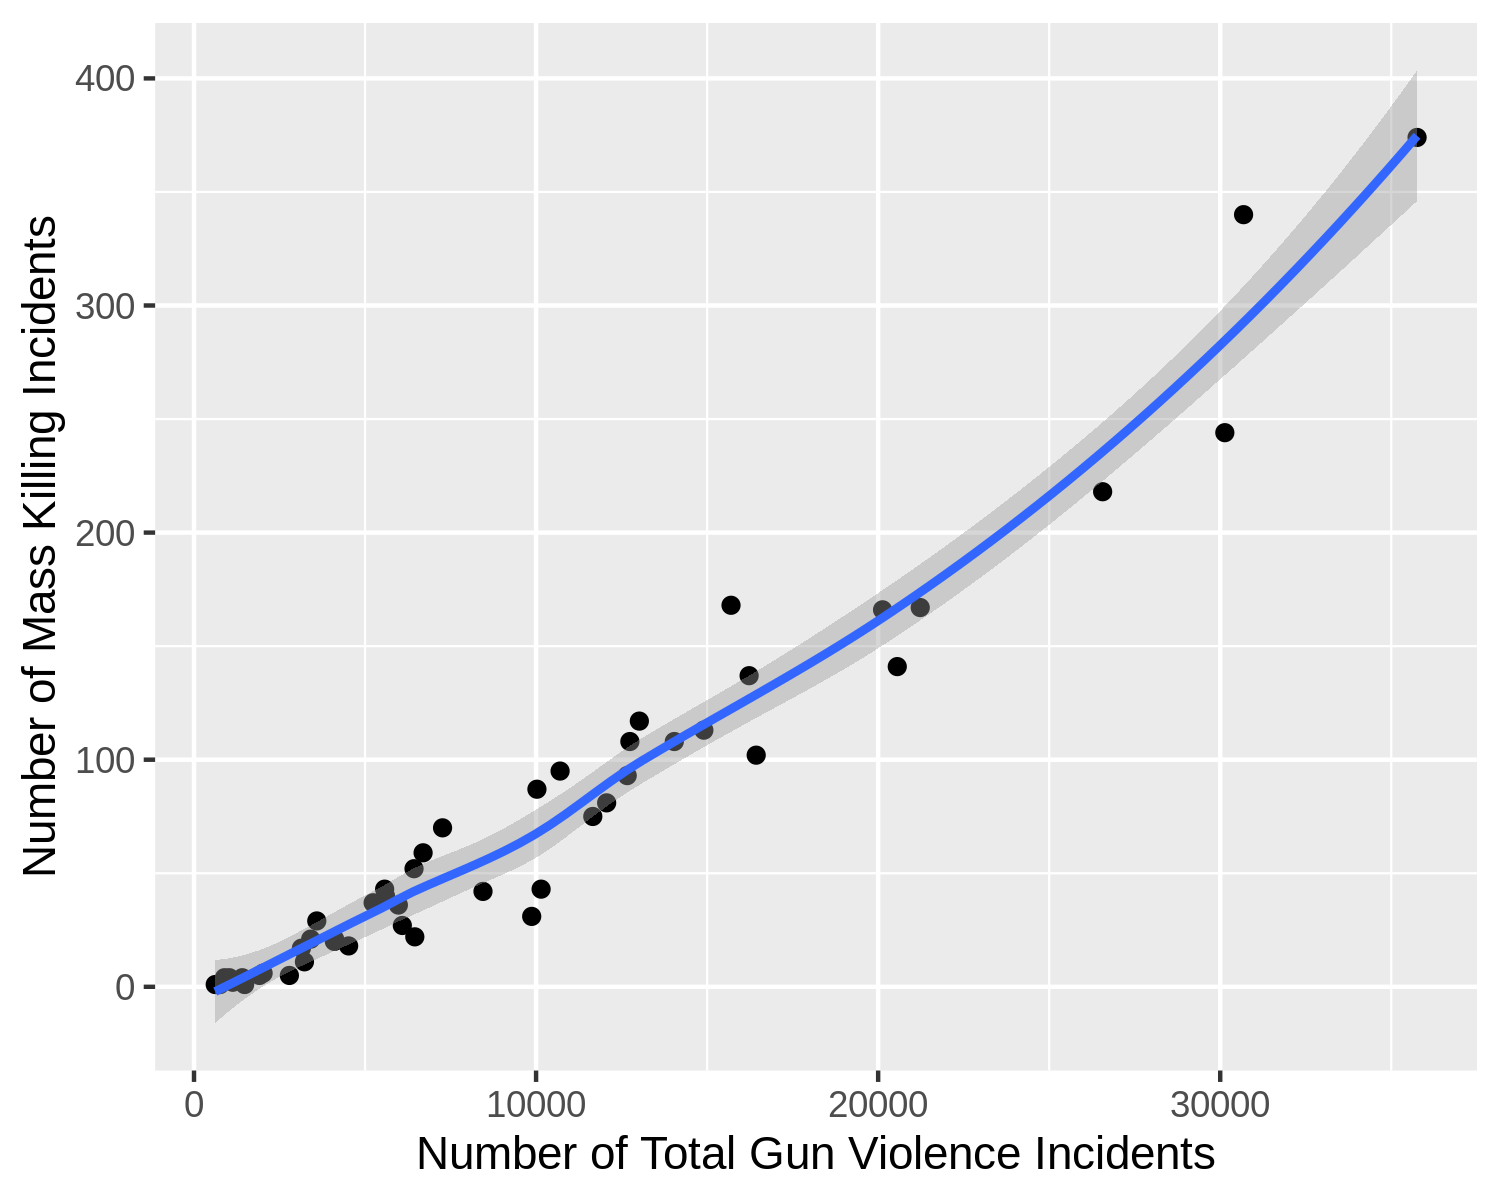

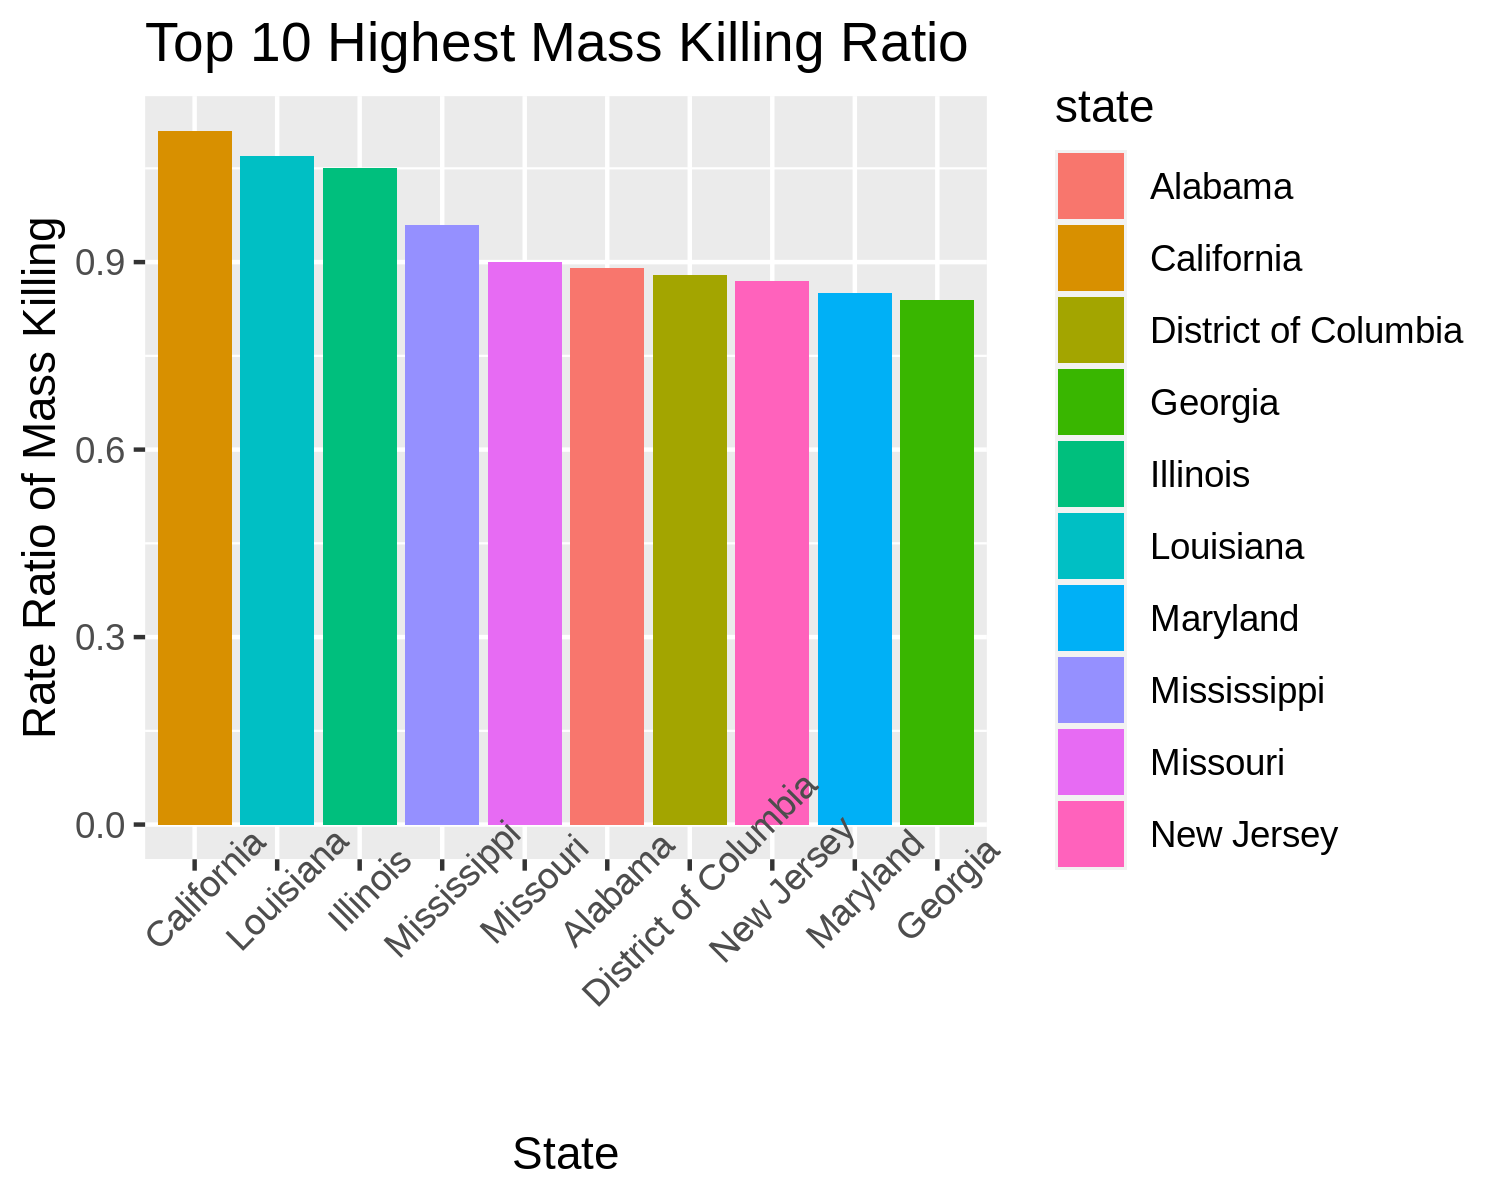

In [12]:
#visualization on number of gun violence incidents
merged_n %>%
    ggplot(aes(x=incident_n, y=shooting_n,)) + geom_point() + geom_smooth() + 
    labs(x='Number of Total Gun Violence Incidents', y='Number of Mass Killing Incidents')

#visualization on highest mass killing ratio
merged_n %>% 
    mutate(ratio_percent=round((merged_n$shooting_n/merged_n$incident_n)* 100, digit=2)) %>% 
    arrange(desc(ratio_percent)) %>% head(10) %>%
    ggplot(aes(x=reorder(state, -ratio_percent), y=ratio_percent, fill=state)) + geom_bar(stat='identity') + theme(axis.text.x = element_text(angle=45)) + labs(x='State', y='Rate Ratio of Mass Killing', 
                                                         title='Top 10 Highest Mass Killing Ratio')

# Explanation of Analysis and Conclusions

Communities across the United States are affected by the preventable public health tragedy known as gun violence. Although data on gun fatalities are the most trustworthy sort of gun violence data currently available, it is vital to understand that gun deaths are merely the very beginning of the epidemic of gun violence. In addition to shooting deaths, many more persons are wounded by gunfire but recover, are fired upon but escape unharmed, or witness gun violence. Many others encounter gun violence in various ways, such as through residing in areas where it is prevalent, losing loved ones to it, or coming into contact with it. This has impacts on productivity and social capital in American society. The dataset featured in this analysis was created by reconciling measurements from requests of gun violence incidents provided by the Gun Violence Archive (GVA). This analysis covers gun violence incidents in the United States from 2013 to the present day, with the most latest data being updated in 2022. My hope is that with this analysis, it raises awareness about the magnitude of this issue.


Source: Gun Violence Incidents - https://www.gunviolencearchive.org

In the top 10 states, Visualization 1 shows the proportion of the association between incidents and mass killing. Illinois, California, Texas, Florida, Pennsylvania, Ohio, New York, North Carolina, Georgia, and Louisana were the states were the most gun violence cases. Many of these same states appear in the states with the most mortality by gun violence cases, such as Illinois, California, Texas, Florida, Louisana, Ohio, New York, North Carolina, and Georgia.  Next steps would include comparing the tables in Visualization 1 to states that enforce Universal Background Checks or states that have/do not have "Stand Your Ground" laws enacted. 

Visualization 2 shows a positive relationship between total gun violence incidents and mass killing incidents. Visualization 3 shows that most states under 1% of mass killing incidents rate include California, Lousiana, Illinois, Mississippi, Missouri, Alabama, District of Columbia, New Jersey, Maryland, Georgia. The states of California, Louisana, Illinois, and Mississippi had the highest rates, which was above 0.90. Next steps would include re-creating the same graphics, but with cities within the idenified listing of top states with most gun violence or most deaths by mass shootings. The more cases of gun violence happen, the more mass killing incidents happen.
